# Exploratory Data Analysis

In this notebook, we seek to carry out Exploratory Data Analysis on the football players' datasets (`diff_df`) we obtained after processing the different datasets we had in the Data Preparation notebook. This will allow us to gain insights and understanding of the footballers' statistics and the correlation with monetary value. 

Exploratory Data Analysis involves examining the data in various ways, such as looking at summary statistics, visualizing the data, identifying patterns and trends, and checking for outliers and missing values.

### Essential Libraries

- NumPy : Library for Numeric Computations in Python  
- Pandas : Library for Data Acquisition and Preparation  
- Matplotlib : Low-level library for Data Visualization  
- Seaborn : Higher-level library for Data Visualization  

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

### Importing the Dataset

In [2]:
diff_df = pd.read_csv('stats_and_values_diff.csv')
diff_df.head()

,Name,Position,Market_Value,Age,MP,Starts,Min,90s,Gls,Ast,...,CrdY,CrdR,PrgC,PrgP,PrgR,Gls (90),Ast (90),G+A (90),G-PK (90),G+A-PK (90)
0,Aaron Cresswell,Defender,-2000000.0,1.0,-16.0,-17.0,-1480.0,-16.4,-1.0,-2.0,...,-6.0,0.0,0.0,-34.0,41.0,-0.03,-0.03,-0.06,-0.03,-0.06
1,Aaron Lennon,Attack,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
2,Aaron Mooy,Midfield,0.0,1.0,-7.0,-9.0,-737.0,-8.2,-1.0,-2.0,...,0.0,0.0,6.0,-85.0,17.0,0.00,-0.05,-0.06,-0.01,-0.06
3,Aaron Ramsey,Midfield,-5000000.0,1.0,4.0,-7.0,-515.0,-5.7,-3.0,-2.0,...,0.0,0.0,-14.0,-46.0,-28.0,-0.07,0.02,-0.05,-0.07,-0.05
4,Aaron Wan-Bissaka,Defender,30000000.0,1.0,28.0,28.0,2507.0,27.8,0.0,3.0,...,3.0,1.0,78.0,136.0,105.0,0.00,0.09,0.09,0.00,0.09


### Outlier Removal

In order to decrease the chances of outliers leading to inaccurate results, we will trim these data points from the dataset.

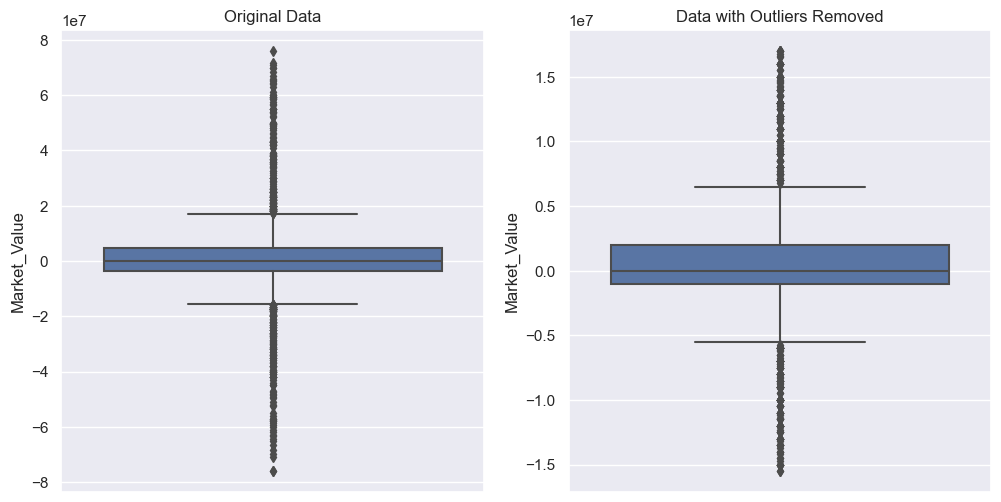

In [3]:
from scipy import stats

z_scores = stats.zscore(diff_df['Market_Value'])

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
diff_df = diff_df[filtered_entries]

# Calculate the first and third quartiles
q1 = diff_df['Market_Value'].quantile(0.25)
q3 = diff_df['Market_Value'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Define the upper and lower bounds for outliers
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

# Remove the outliers
diff_df_no_outliers = diff_df[(diff_df['Market_Value'] >= lower_bound) & (diff_df['Market_Value'] <= upper_bound)]

# Visualize the original and cleaned data using a box plot
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
sb.boxplot(y='Market_Value', data=diff_df, ax=axs[0])
axs[0].set_title('Original Data')
sb.boxplot(y='Market_Value', data=diff_df_no_outliers, ax=axs[1])
axs[1].set_title('Data with Outliers Removed')
plt.show()

### Skew

Skewness is a measurement of the distortion of symmetrical distribution or asymmetry in a data set. Skewness is demonstrated on a bell curve when data points are not distributed symmetrically to the left and right sides of the median on a bell curve. If the bell curve is shifted to the left or the right, it is said to be skewed.

Hence, we will analyse the skew of the different factors.

Skewness of Market_Value: 0.23
Skewness of Age: 0.24
Skewness of MP: -0.10
Skewness of Starts: 0.02
Skewness of Min: -0.03
Skewness of 90s: -0.03
Skewness of Gls: 0.36
Skewness of Ast: -0.42
Skewness of G+A: 0.28
Skewness of G-PK: 0.12
Skewness of PK: 1.01
Skewness of PKatt: 0.26
Skewness of CrdY: 0.23
Skewness of CrdR: -1.30
Skewness of PrgC: -0.24
Skewness of PrgP: -0.11
Skewness of PrgR: -0.16
Skewness of Gls (90): -1.37
Skewness of Ast (90): -32.19
Skewness of G+A (90): -25.12
Skewness of G-PK (90): -1.55
Skewness of G+A-PK (90): -25.59


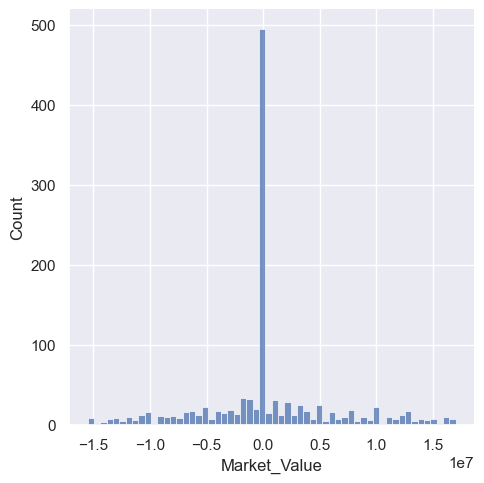

In [18]:
from scipy.stats import skew

numeric_cols = diff_df_no_outliers.select_dtypes(include='number').columns
for col in numeric_cols:
    skewness = skew(diff_df_no_outliers[col])
    print(f"Skewness of {col}: {skewness:.2f}")
    
# Create a histogram and KDE of the distribution of Market_Value
sb.displot(diff_df_no_outliers['Market_Value'])

### Based on the skewness values, we can make the following observations:

- Market_Value and Age have a skewness close to zero, indicating that their distributions are approximately symmetrical.

- MP, Min, 90s, PrgC, PrgP, and PrgR have a small negative skewness value, indicating that their distributions are slightly skewed to the left.

- Starts and G-PK have a skewness value close to zero, indicating that their distributions are approximately symmetrical.

- Gls, G+A, G-PK (90), and G+A-PK (90) have a positive skewness value, indicating that their distributions are skewed to the right.

- Ast, Ast (90), and G+A (90) have a large negative skewness value, indicating that their distributions are heavily skewed to the left.

- PK and PKatt have a positive skewness value, indicating that their distributions are skewed to the right.

- CrdY has a positive skewness value, indicating that its distribution is skewed to the right.

- CrdR has a large negative skewness value, indicating that its distribution is heavily skewed to the left.

Overall, the skewness values suggest that the distributions of some of the variables may not be perfectly normal.

### Generating a list of the Predictors

In [5]:
# Generating a list of the predictors 
predictors = list(diff_df_no_outliers.columns)
predictors = predictors[2:]
predictors

['Market_Value',
 'Age',
 'MP',
 'Starts',
 'Min',
 '90s',
 'Gls',
 'Ast',
 'G+A',
 'G-PK',
 'PK',
 'PKatt',
 'CrdY',
 'CrdR',
 'PrgC',
 'PrgP',
 'PrgR',
 'Gls (90)',
 'Ast (90)',
 'G+A (90)',
 'G-PK (90)',
 'G+A-PK (90)']

### Identifying the Top 5 Predictors with the highest correlation to `Market_Value`

Market Value    1.000000
G+A             0.280890
PrgP            0.274467
MP              0.271589
PrgC            0.250278
G-PK            0.246541
Name: Market Value, dtype: float64


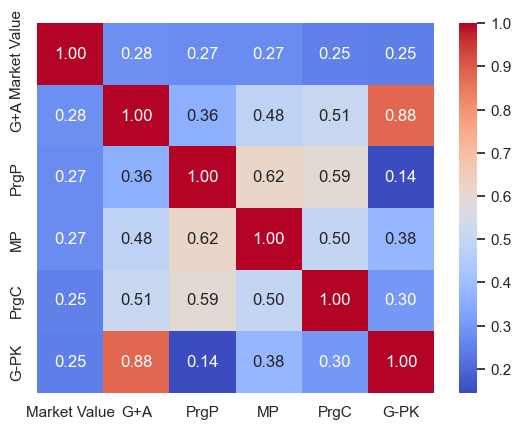

In [6]:
# Select the variables to include in the heatmap
corr = diff_df_no_outliers[predictors].corr()['Market_Value']
corr = corr.abs().sort_values(ascending=False)
top_5 = corr[1:6].index.tolist()  # exclude 'difference' column
df = diff_df_no_outliers[['Market_Value']+top_5]

# Rename the Market_Value column to avoid duplicates
df = df.rename(columns={'Market_Value':'Market Value'})

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix as a heatmap
sb.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')

# Display the correlation values between "Market_Value" and the other columns
market_value_corr = corr_matrix['Market Value']
print(market_value_corr)

# Show the plot
plt.show()

### How Many Players' Value Increased?

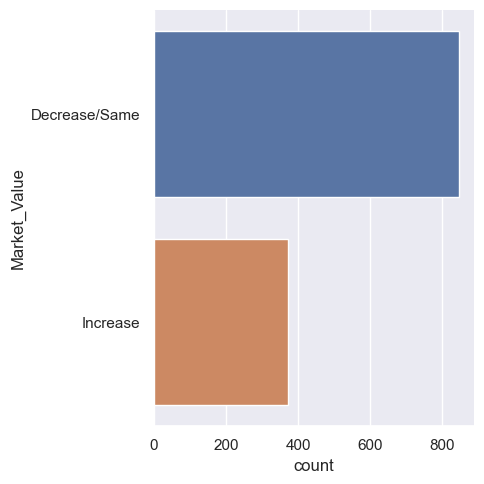

In [7]:
# function to change Market_Value column 
def change(row):
    if row['Market Value'] <= 0:
        return 'Decrease/Same'
    else:
        return 'Increase'
    
df['Market_Value'] = df.apply(change, axis=1)
df

sb.catplot(y = 'Market_Value', data = df, kind = "count")

## Breaking It Down By Positions

We know that the factors above are generalised. Hence there is a need to break the factors down to each position (Attackers, Midfielders, Defenders & Goalkeepers) in order to obtain a more accurate picture.

### Attackers

Market_Value    1.000000
MP              0.266241
G+A             0.256346
90s             0.254813
Min             0.254544
Ast             0.253179
Name: Market_Value, dtype: float64


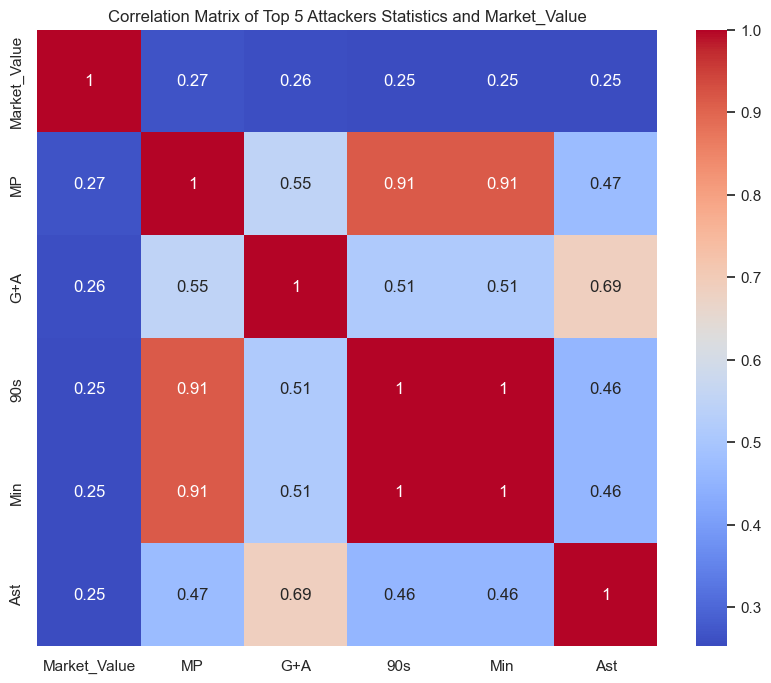

In [8]:
att_predictors = list(diff_df_no_outliers.columns)
att_predictors = att_predictors[2:]

att_df = diff_df_no_outliers[(diff_df_no_outliers['Position'] == 'Attack')]
att_corr = att_df[att_predictors].corr()['Market_Value']
att_corr = att_corr.abs().sort_values(ascending=False)

top_5_att = att_corr[1:6].index.tolist()  # exclude 'difference' column
df = att_df[['Market_Value']+top_5_att]
df = df.rename(columns={'Market_Value':'Market_Value'})

# Compute the correlation matrix
att_corr_matrix = df.corr()

# Display the correlation values between "Market_Value" and the other columns
att_market_value_corr = att_corr_matrix['Market_Value']
print(att_market_value_corr)

plt.figure(figsize=(10, 8))
sb.heatmap(att_corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Top 5 Attackers Statistics and Market_Value')
plt.show()

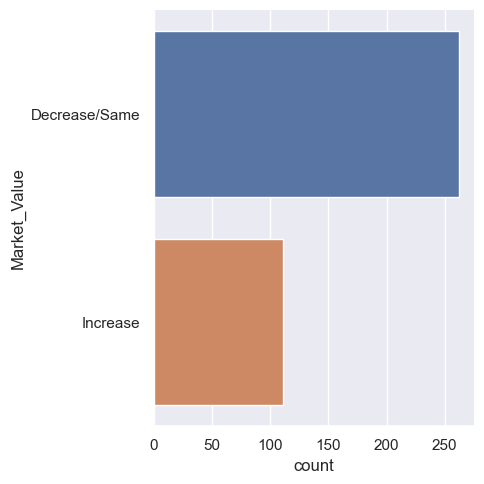

In [9]:
# function to change Market_Value column 
def change(row):
    if row['Market_Value'] <= 0:
        return 'Decrease/Same'
    else:
        return 'Increase'
    
df['Market_Value'] = df.apply(change, axis=1)
df

sb.catplot(y = 'Market_Value', data = df, kind = "count")

### Midfielders

Market_Value    1.000000
G+A             0.354680
Gls             0.329282
G-PK            0.318803
PrgC            0.308968
PrgR            0.278495
Name: Market_Value, dtype: float64


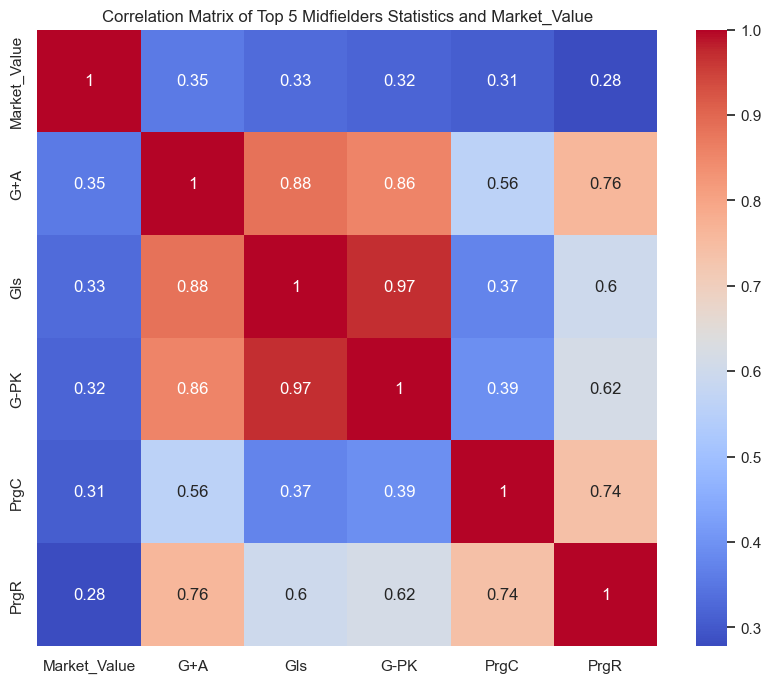

In [10]:
mid_predictors = list(diff_df_no_outliers.columns)
mid_predictors = mid_predictors[2:]

mid_df = diff_df_no_outliers[(diff_df_no_outliers['Position'] == 'Midfield')]
mid_corr = mid_df[mid_predictors].corr()['Market_Value']
mid_corr = mid_corr.abs().sort_values(ascending=False)

top_5_mid = mid_corr[1:6].index.tolist()  # exclude 'difference' column
df = mid_df[['Market_Value']+top_5_mid]
df = df.rename(columns={'Market_Value':'Market_Value'})

# Compute the correlation matrix
mid_corr_matrix = df.corr()

# Display the correlation values between "Market_Value" and the other columns
mid_market_value_corr = mid_corr_matrix['Market_Value']
print(mid_market_value_corr)

plt.figure(figsize=(10, 8))
sb.heatmap(mid_corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Top 5 Midfielders Statistics and Market_Value')
plt.show()

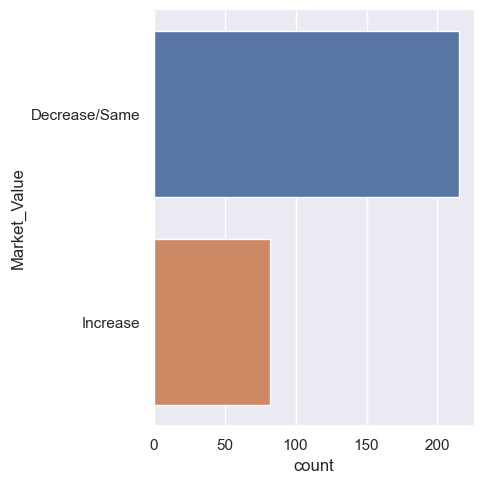

In [11]:
# function to change Market_Value column 
def change(row):
    if row['Market_Value'] <= 0:
        return 'Decrease/Same'
    else:
        return 'Increase'
    
df['Market_Value'] = df.apply(change, axis=1)
df

sb.catplot(y = 'Market_Value', data = df, kind = "count")

### Defenders

Market_Value    1.000000
MP              0.310930
PrgP            0.307566
Min             0.294176
90s             0.293988
Starts          0.288888
Name: Market_Value, dtype: float64


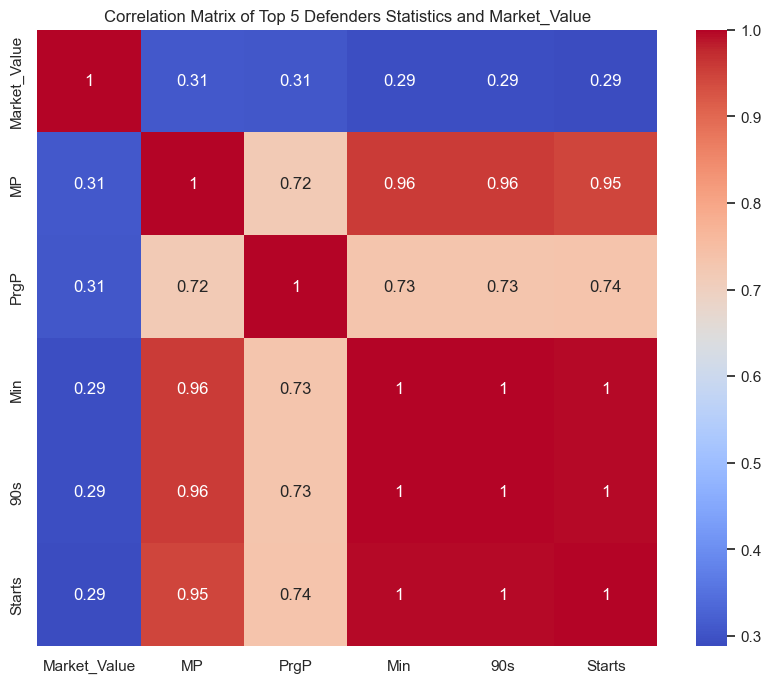

In [12]:
def_predictors = list(diff_df_no_outliers.columns)
def_predictors = def_predictors[2:]

def_df = diff_df_no_outliers[(diff_df_no_outliers['Position'] == 'Defender')]
def_corr = def_df[def_predictors].corr()['Market_Value']
def_corr = def_corr.abs().sort_values(ascending=False)

top_5_def = def_corr[1:6].index.tolist()  # exclude 'difference' column
df = def_df[['Market_Value']+top_5_def]
df = df.rename(columns={'Market_Value':'Market_Value'})

# Compute the correlation matrix
def_corr_matrix = df.corr()

# Display the correlation values between "Market_Value" and the other columns
def_market_value_corr = def_corr_matrix['Market_Value']
print(def_market_value_corr)

plt.figure(figsize=(10, 8))
sb.heatmap(def_corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Top 5 Defenders Statistics and Market_Value')
plt.show()

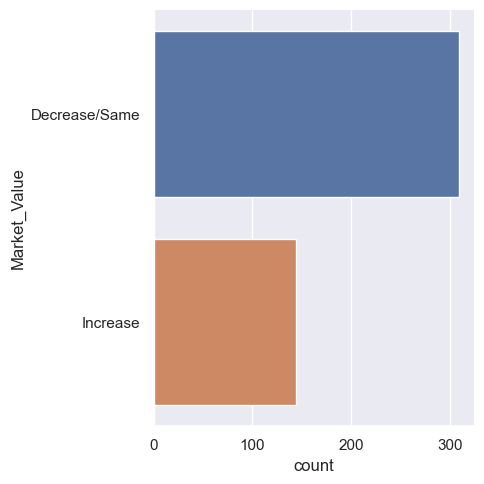

In [13]:
# function to change Market_Value column 
def change(row):
    if row['Market_Value'] <= 0:
        return 'Decrease/Same'
    else:
        return 'Increase'
    
df['Market_Value'] = df.apply(change, axis=1)
df

sb.catplot(y = 'Market_Value', data = df, kind = "count")

### Goalkeepers

Market_Value    1.000000
G+A             0.375906
CrdY            0.367592
Gls             0.350834
PrgP            0.340214
Ast             0.333888
Name: Market_Value, dtype: float64


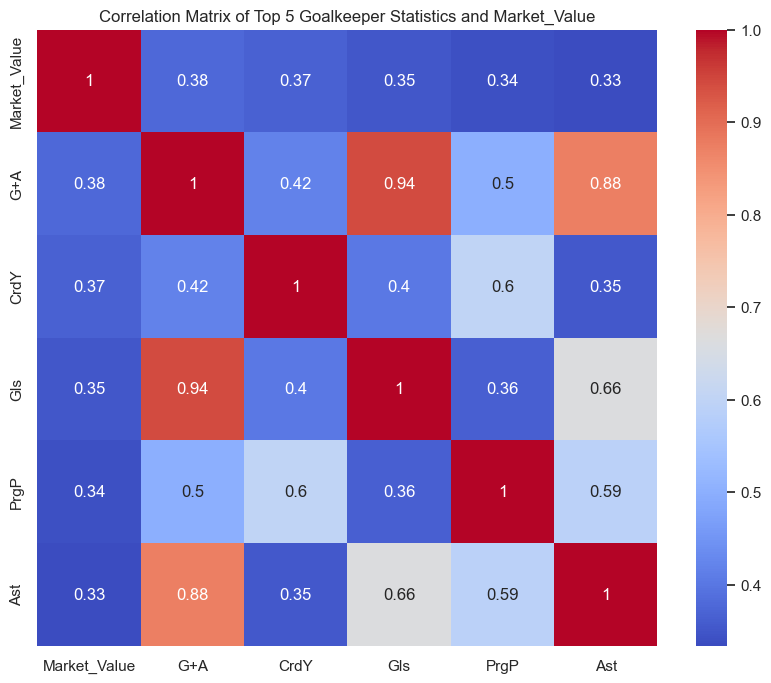

In [16]:
gk_predictors = list(diff_df_no_outliers.columns)
gk_predictors = gk_predictors[2:]

gk_df = diff_df_no_outliers[(diff_df_no_outliers['Position'] == 'Goalkeeper')]
gk_corr = gk_df[gk_predictors].corr()['Market_Value']
gk_corr = gk_corr.abs().sort_values(ascending=False)

top_5_gk = gk_corr[1:6].index.tolist()  # exclude 'difference' column
df = gk_df[['Market_Value']+top_5_gk]
df = df.rename(columns={'Market_Value':'Market_Value'})

# Compute the correlation matrix
gk_corr_matrix = df.corr()

# Display the correlation values between "Market_Value" and the other columns
gk_market_value_corr = gk_corr_matrix['Market_Value']
print(gk_market_value_corr)

plt.figure(figsize=(10, 8))
sb.heatmap(gk_corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Top 5 Goalkeeper Statistics and Market_Value')
plt.show()

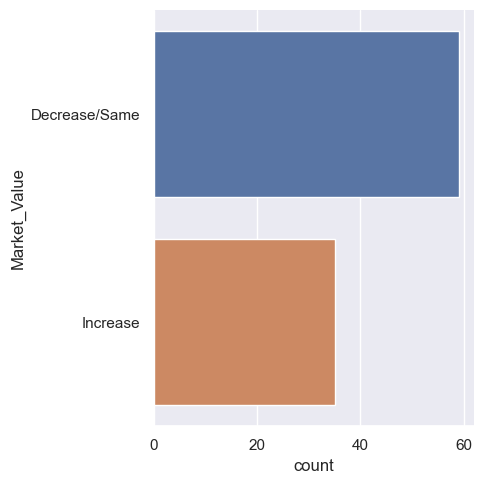

In [17]:
# function to change Market_Value column 
def change(row):
    if row['Market_Value'] <= 0:
        return 'Decrease/Same'
    else:
        return 'Increase'
    
df['Market_Value'] = df.apply(change, axis=1)
df

sb.catplot(y = 'Market_Value', data = df, kind = "count")

## Insights from the EDA

- Generally, it is more likely for a player's monetary value to decrease or plateau, rather than increase
- This trend can be seen across all positions

- Also, which position is the player's monetary value most likely to increase?
- As seen from the graphs, it is most likely for a Goalkeeper's monetary value to increase

## Convert to .csv 

Now that we have processed the data by removing the outliers, we will convert the `diff_df.csv` to `diff_df_no_outliers.csv`

In [53]:
diff_df_no_outliers.to_csv('diff_df_no_outliers.csv', index=False)